In [39]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
import scipy.stats

<div class="alert alert-info">
<b>Задание № 0</b>

Найдите минимально необходимый объем выборки для построения интервальной оценки среднего.

- желаемая точность $\Delta$ = 3;
- дисперсия $\sigma^2$  = 225;
- уровень доверия $\beta$ = 0.95.
</div>

In [4]:
disp = 225
sigma = np.sqrt(disp)  # Стандартное отклонение
Z = 1.96  # 95%   # Квантиль нормального распределения. 
Delta = 3 #  #Погрешность

In [12]:
N = ((sigma*Z)/Delta)**2
print(f'Минимально необходимый объем выборки: {round(int(N))}')

Минимально необходимый объем выборки: 96


<div class="alert alert-info">
<b>Задание № 1</b>

Постройте `98% доверительный интервал` для среднего значения, если известно, что

- объем выборки n = 25;
- среднее значение по выборке $\overline x$ = 130;
- Из достоверных источников известно стандартное отклонение $\sigma = 12$.
</div>

In [14]:
confidence = 0.98
n = 25
m, se = 130, 12
h = se * scipy.stats.t.ppf((1 + confidence) / 2, n)
print (f'98% доверительный интервал для среднего значения от {m-h} до {m+h}')

98% доверительный интервал для среднего значения от 100.1787138950723 до 159.8212861049277


<div class="alert alert-info">
<b>Задание № 2</b>

Даны две выборки роста мужчин и женщин. 
- Докажите, используя `t-Тест Стьдента`, что различие между выборками незначительно, если уровень значимости равен $\alpha$ `= 0.001`.
- Покажите различия визуально
</div>

In [10]:
population_men  = stats.norm.rvs(loc=19, scale=171, size=11000000)  # Выборка мужчин со средним ростом 171
population_women = stats.norm.rvs(loc=16, scale=165, size=12000)  # Выборка женщин со средним ростом 165

* H0 - различия в выборках мужчин и женщин статистически не значимы
* H1 - различия в выборках мужчин и женщин статистически значимы

In [20]:
alpha = 0.001
t, p = scipy.stats.ttest_ind(population_men, population_women, equal_var=False)

print("t = " + str(t))
print("p = " + str(p))

if p < alpha:
    print(f'Отклоняем гипотезу H0, различия в выборках мужчин и женщин статистически значимы')
else:
    print(f'Гипотеза H0 верна, различия в выборках мужчин и женщин статистически не значимы')

t = 2.2252177336710215
p = 0.026085098305576666
Гипотеза H0 верна, различия в выборках мужчин и женщин статистически не значимы


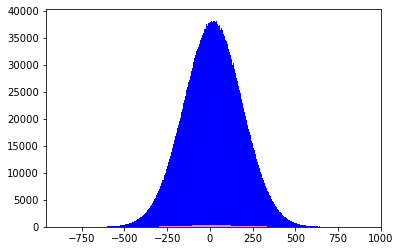

In [4]:
plt.hist(population_men, bins=1200, color='blue');
plt.hist(population_women, bins=120, color='violet');

<div class="alert alert-info">
<b>Задание № 3</b>

Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе если известно, что в этом городе:

- стандартное отклонение $\sigma = 150$;
- уровень доверия $\beta$  = 95%;
- Погрешность $\Delta = 50$ рублей.
</div>

In [1]:
sigma = 150  # Стандартное отклонение
Z = 1.96  # 95%   # Квантиль нормального распределения. 
Delta = 50  #Погрешность

In [3]:
N = ((sigma*Z)/Delta)**2
print(f'Объем необходимой выборки: {round(int(N))}')

Объем необходимой выборки: 34


<div class="alert alert-info">
<b>Задание № 4</b>

Представьте, что вы хотите разоблачить "волшебника" который считает, что умеет предсказывать погоду на завтра, отвечая просто: дождь или солнце. Вы пронаблюдали за ответами "волшебника" в течении какого-то периода времени и получили некие результаты (см.ниже).

Можно ли сказать, что маг действительно умеет предсказывать погоду? Уровень значимости принять за `0.05` ($\alpha=0.05$).
</div>

In [13]:
observations = pd.DataFrame([[10,15],[39,34]],
                            index=['Дождь','Солнце'],
                            columns=['Ответ волшебника','Реальность'])
observations

,Ответ волшебника,Реальность
Дождь,10,15
Солнце,39,34


* H0 - Волшебник умеет предсказывать погоду
* H1 - Волшебник не умеет предсказывать погоду

In [35]:
alpha = 0.05
oddsratio, p = scipy.stats.fisher_exact(observations)

print(f'p = {p}')
if p < alpha:
    print(f'Отклоняем гипотезу H0, волшебник не умеет предсказывать погоду')
else:
    print(f'Гипотеза H0 верна, волшебник умеет предсказывать погоду')

p = 0.35417955365927367
Гипотеза H0 верна, волшебник умеет предсказывать погоду


<div class="alert alert-info">
<b>Задание № 5</b> 

Используя функцию mean_confidence_interval(data, confidence), постройте доверительный интервал с уровнем доверия $\beta = 90\%$ для выборки:

</div>

In [21]:
data = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,
        7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

In [23]:
def mean_confidence_interval(data, confidence=0.9):   
    n = len(data)
    m, se = np.mean(data), scipy.stats.sem(data)
    h = se * scipy.stats.t.ppf((1 + confidence)/2, n)
    return m-h, m, m+h

In [24]:
print(mean_confidence_interval(data, 0.9))

(6.074074746111319, 6.628571428571429, 7.183068111031539)


<div class="alert alert-info">
<b>Задание № 6</b>

Принадлежат ли выборки data_1 и data_2 одному множеству? 
    
- Оцените это с помощью известных вам тестов для проверок статистических гипотез;
- Покажите различия визуально.
</div>

In [26]:
data_1 = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,
          6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

data_2 = [8,5,6,7,0,1,8,4,6,7,0,2,6,5,7,5,3,5,3,
          5,3,5,5,8,7,6,4,5,3,5,4,6,4,5,3,2,6,4,
          2,6,1,0,4,3,5,4,3,4,5,4,3,4,5,4,3,4,5,
          3,4,4,1,2,4,3,1,2,4,3,2,1,5,3,4,6,4,5,
          3,2,4,5,6,4,3,1,3,5,3,4,4,4,2,5,3]

* H0 - data_1 и data_2  не отличаются
* H1 - data_1 и data_2 отличаются

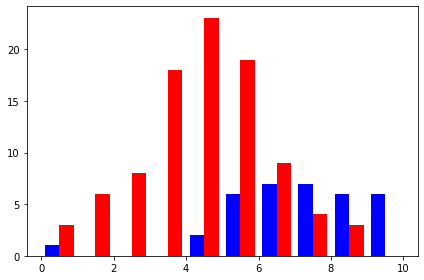

In [31]:
colors = ['b','r']

fig, ax1 = plt.subplots()
ax1.hist([data_1,data_2],color=colors)
plt.tight_layout()
plt.show()

In [33]:
#  Критерий Стьюдента для независимых выборок
stat, p = scipy.stats.ttest_ind(data_1, data_2)
alpha = 0.05

# двусторонний тест
print(f'p = {p}')

if p < alpha:
    print(f'Верна гипотеза H1: data_1 и data_2 отличаются')
else:
    print(f'Верна гипотеза H0: data_1 и data_2 не отличаются')

p = 2.1159475572725764e-11
Верна гипотеза H1: data_1 и data_2 отличаются


In [34]:
# Критерий Манна-Уитни
stat, p = scipy.stats.mannwhitneyu(data_1, data_2)
alpha = 0.05

# двусторонний тест
print(f'p = {p}')

if p < alpha:
    print(f'Верна гипотеза H1: data_1 и data_2 отличаются')
else:
    print(f'Верна гипотеза H0: data_1 и data_2 не отличаются')

p = 1.5430266928575232e-10
Верна гипотеза H1: data_1 и data_2 отличаются


<div class="alert alert-info">
<b>Задание № 7 (задание без подвоха)</b>

На примере датасета про жилье в New York City, мы сталкивались с примером, когда переменная имеет не совсем нормальное распределение. 

- Предположим, Вы сформировали две гипотезы:
    - нулевая гипотеза - распределение нормальное;
    - альтернативная гипотеза - распределение ненормальное.
- допустим, вы применили какой-то тест (сейчас неважно какой), который показал уровень значимости  `p-value = 0.03`. Каковы будут ваши выводы? Будем считать что у нас нормальное распределение или все-таки нет?)
    
</div>

p-value < 0.05, поэтому Н0 можно отвергнуть и принять Н1(вероятно распределение не является нормальным)

<div class="alert alert-info">
<b>Задание № 8</b>
    
Первая выборка — это пациенты, которых лечили препаратом `А`.  Вторая выборка — пациенты, которых лечили препаратом `B`.

Значения в выборках — это некоторая характеристика эффективности лечения (уровень метаболита в крови, температура через три дня после начала лечения, срок выздоровления, число койко-дней, и т.д.) 

- Требуется выяснить, имеется ли значимое различие эффективности препаратов `А` и `B`, или различия являются чисто случайными и объясняются «естественной» дисперсией выбранной характеристики?  (`уровень значимости принять за 0.05 (5%)`)

- При каком минимальном p-value различия были бы уже значимы? 
    
- Если выборки незначительно отличаются, то продемонстрируйте это визуально
</div>

In [36]:
np.random.seed(11)
A = stats.norm.rvs(scale=50,loc=10,size=300)
B = A+stats.norm.rvs(scale=10,loc=-7.5,size=300)

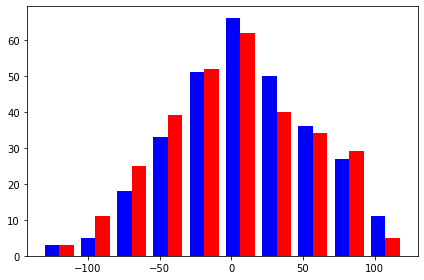

In [37]:
colors = ['b','r']

fig, ax1 = plt.subplots()
ax1.hist([A,B],color=colors)
plt.tight_layout()
plt.show()
# визуальное отличие невелико, но оно есть

In [44]:
stats.ttest_ind(a=A,b=B,equal_var=False)

Ttest_indResult(statistic=1.8847229265385363, pvalue=0.05995260332765237)

In [46]:
alpha = 0.05
pvalue=0.05995260332765237 #Различия были бы значимы, если p-value был бы меньше принятого нами уровня значимости 0,05

if pvalue < alpha:  
    print(f'Эффективность препаратов отличается при уровне значимости {alpha :.1%}')
else:
    print(f'Эффективность препаратов одинакова при уровне значимости {alpha :.1%}')

Эффективность препаратов одинакова на уровне значимости 5.0%
